Импортируем необходимые библиотеки

In [131]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt

In [132]:
from sklearn.cluster import KMeans
from sklearn import datasets

Загрузим нужный датасет

In [133]:
from sklearn.datasets import load_boston;
boston_dataset = load_boston()
data = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)#признаки

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [134]:
data_target = pd.DataFrame(boston_dataset.target)#целевые значения (цена жилья)

In [135]:
#data = pd.read_csv('/content/housing.csv', sep = ';')
#from sklearn.datasets import load_boston
#boston = load_boston()
#data = boston.data

In [136]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


Просмотрим типы данных и пропуски

In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


Информация о датасете

In [138]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [139]:
data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [140]:
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']

target = data_target

In [141]:
x = data[features]
y = data_target

Разбиение датасета на обучающую и тестовую выборки

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
477,15.02340,0.0,18.10,0.0,0.6140,5.304,97.3,2.1007,24.0,666.0,20.2,349.48,24.91
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
332,0.03466,35.0,6.06,0.0,0.4379,6.031,23.3,6.6407,1.0,304.0,16.9,362.25,7.83
423,7.05042,0.0,18.10,0.0,0.6140,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
19,0.72580,0.0,8.14,0.0,0.5380,5.727,69.5,3.7965,4.0,307.0,21.0,390.95,11.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.5200,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.4640,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.4350,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.7400,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


Проведем масштабирование данных

In [144]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [145]:
features_for_fit = x[features].select_dtypes(include=['float64']).columns.tolist()
features_for_fit

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [146]:
X_train_scaled = scaler.fit_transform(X_train[features_for_fit])
X_test_scaled = scaler.transform(X_test[features_for_fit])

In [147]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = features_for_fit)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = features_for_fit)

Построим модель TSNE на тренировочных данных с параметрами: n_components=2, learning_rate=250, random_state=42


In [148]:
from sklearn.manifold import TSNE

In [149]:
tsne = TSNE(n_components = 2, learning_rate=250, random_state=42)

In [150]:
X_train_tsne = tsne.fit_transform(X_train_scaled);

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


In [151]:
print(X_train_scaled.shape)
print(X_train_tsne.shape)

(404, 13)
(404, 2)


Построим диаграмму рассеяния по модели TSNE

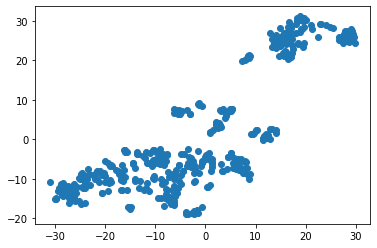

In [152]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

Разобьем данные на 3 кластера при помощи KMeans

In [153]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [154]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [189]:
y_train_np = y_train.to_numpy()

Распределение количества точек по кластерам

In [180]:
pd.value_counts(labels_train)

2    191
1    127
0     86
dtype: int64

Диаграмма рассеяния на данных, полученных с помощью TSNE. Разные кластеры окрашены разными цветами

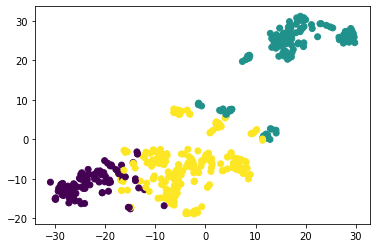

In [158]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c = labels_train)

Тут не нужна инерция, но решила посмотреть

In [159]:
kmeans.inertia_

2820.517707291974

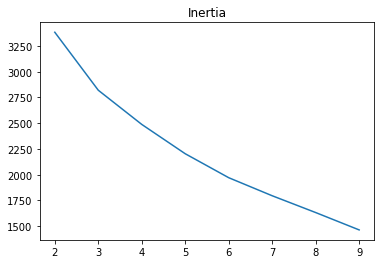

In [160]:
inertias = []

for i in range(2, 10):
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(X_train_scaled)
    
    temp_inertia = temp_model.inertia_
    
    inertias.append(temp_inertia)

plt.plot(range(2, 10), inertias)

plt.title('Inertia')

plt.show()

Рассчитаем среднее значение цены на недвижимость и показателя преступности в каждом кластере

In [161]:
mean_price_0 = round(y_train[labels_train==0].mean(), 1);
mean_crim_0 = round(X_train.loc[labels_train==0, 'CRIM'].mean(), 1);
print(f'Средняя цена в 1 кластере: {mean_price_0.loc[0]}, средний показатель преступности в 1 кластере: {mean_crim_0}')

Средняя цена в 1 кластере: 27.8, средний показатель преступности в 1 кластере: 0.1


In [162]:
mean_price_1 = round(y_train[labels_train==1].mean(), 1);
mean_crim_1 = round(X_train.loc[labels_train==1, 'CRIM'].mean(), 1);
print(f'Средняя цена во 2 кластере: {mean_price_1.loc[0]}, средний показатель преступности во 2 кластере: {mean_crim_1}')

Средняя цена во 2 кластере: 16.2, средний показатель преступности во 2 кластере: 10.8


In [163]:
mean_price_2 = round(y_train[labels_train==2].mean(), 1);
mean_crim_2 = round(X_train.loc[labels_train==2, 'CRIM'].mean(), 1);
print(f'Средняя цена в 3 кластере: {mean_price_2.loc[0]}, средний показатель преступности в 3 кластере: {mean_crim_2}')

Средняя цена в 3 кластере: 25.0, средний показатель преступности в 3 кластере: 0.4


Видно, что чем ниже показатели преступности, тем выше цена на недвижимость

Отобразим распределение цен по кластерам на гистограмме. Заметно, что, как и расчитано, во втором кластере самая дешевая недвидимость, а в первом самая дорогая

Text(0.5, 0, 'Цена')

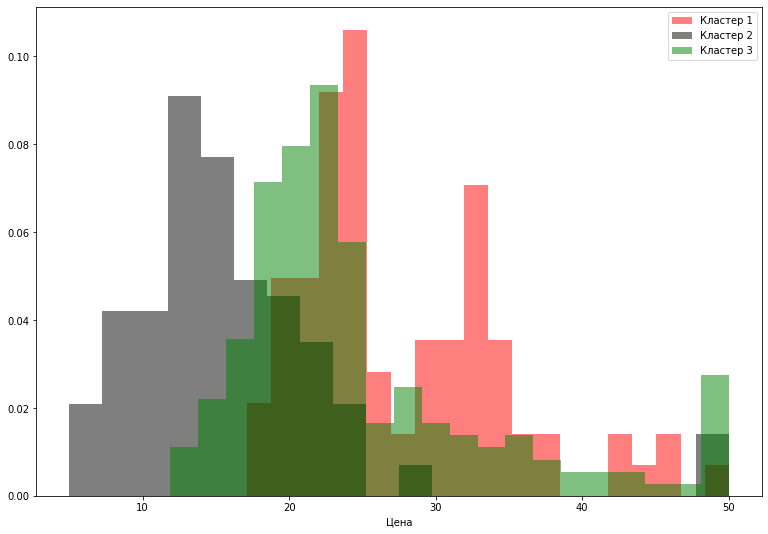

In [197]:
plt.figure(figsize=(13, 9))
plt.hist(y_train_np[labels_train == 0], bins=20, density=True, alpha=0.5, color = 'red')
plt.hist(y_train_np[labels_train == 1], bins=20, density=True, alpha=0.5, color = 'black')
plt.hist(y_train_np[labels_train == 2], bins=20, density=True, alpha=0.5, color = 'green')
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('Цена')

#plt.show()

Применим модель KMeans, построенную в предыдущем задании, к данным из тестового набора


In [85]:
labels_test = kmeans.predict(X_test_scaled)

Распределение количества точек по кластерам

In [86]:
pd.value_counts(labels_test)

1    53
2    35
0    14
dtype: int64

Рассчитаем среднее значение цены на недвижимость и показателя преступности в каждом кластере

In [203]:
mean_price_0 = round(y_test[labels_test==0].mean(), 1);
mean_crim_0 = round(X_test.loc[labels_test==0, 'CRIM'].mean(), 1);
print(f'Средняя цена в 1 кластере: {mean_price_0.loc[0]}, средний показатель преступности в 1 кластере: {mean_crim_0}')

Средняя цена в 1 кластере: 33.9, средний показатель преступности в 1 кластере: 0.1


In [204]:
mean_price_1 = round(y_test[labels_test==1].mean(), 1);
mean_crim_1 = round(X_test.loc[labels_test==1, 'CRIM'].mean(), 1);
print(f'Средняя цена во 2 кластере: {mean_price_1.loc[0]}, средний показатель преступности во 2 кластере: {mean_crim_1}')

Средняя цена во 2 кластере: 21.6, средний показатель преступности во 2 кластере: 0.3


In [202]:
mean_price_2 = round(y_test[labels_test==2].mean(), 1);
mean_crim_2 = round(X_test.loc[labels_test==2, 'CRIM'].mean(), 1);
print(f'Средняя цена в 3 кластере: {mean_price_2.loc[0]}, средний показатель преступности в 3 кластере: {mean_crim_2}')

Средняя цена в 3 кластере: 16.4, средний показатель преступности в 3 кластере: 10.2


In [198]:
y_test_np = y_test.to_numpy()

Text(0.5, 0, 'Цена')

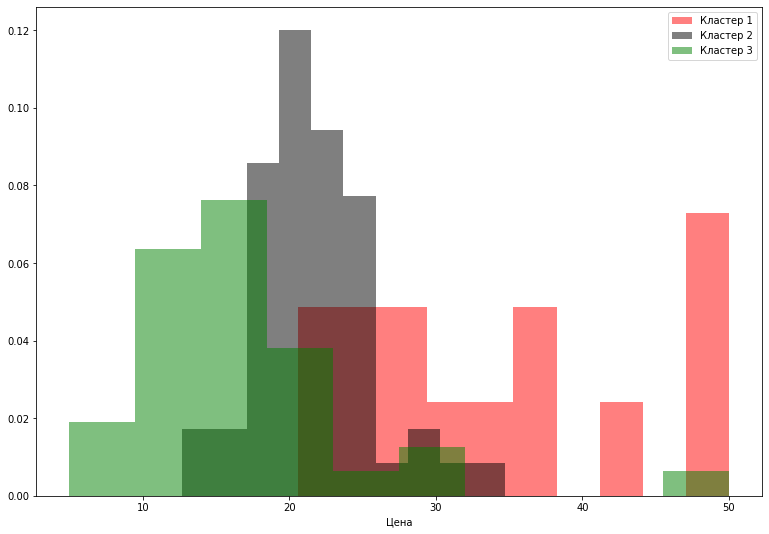

In [201]:
plt.figure(figsize=(13, 9))
plt.hist(y_test_np[labels_test == 0], bins=10, density=True, alpha=0.5, color = 'red')
plt.hist(y_test_np[labels_test == 1], bins=10, density=True, alpha=0.5, color = 'black')
plt.hist(y_test_np[labels_test == 2], bins=10, density=True, alpha=0.5, color = 'green')
plt.legend(['Кластер 1', 'Кластер 2', 'Кластер 3'])
plt.xlabel('Цена')